Importing Libraries

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [259]:
df=pd.read_csv(r"C:\Users\satya\OneDrive\Desktop\ML Projects\dataset\MagicBricks.csv")

In [260]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [262]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [263]:
df.shape

(1259, 11)

<Figure size 720x576 with 0 Axes>

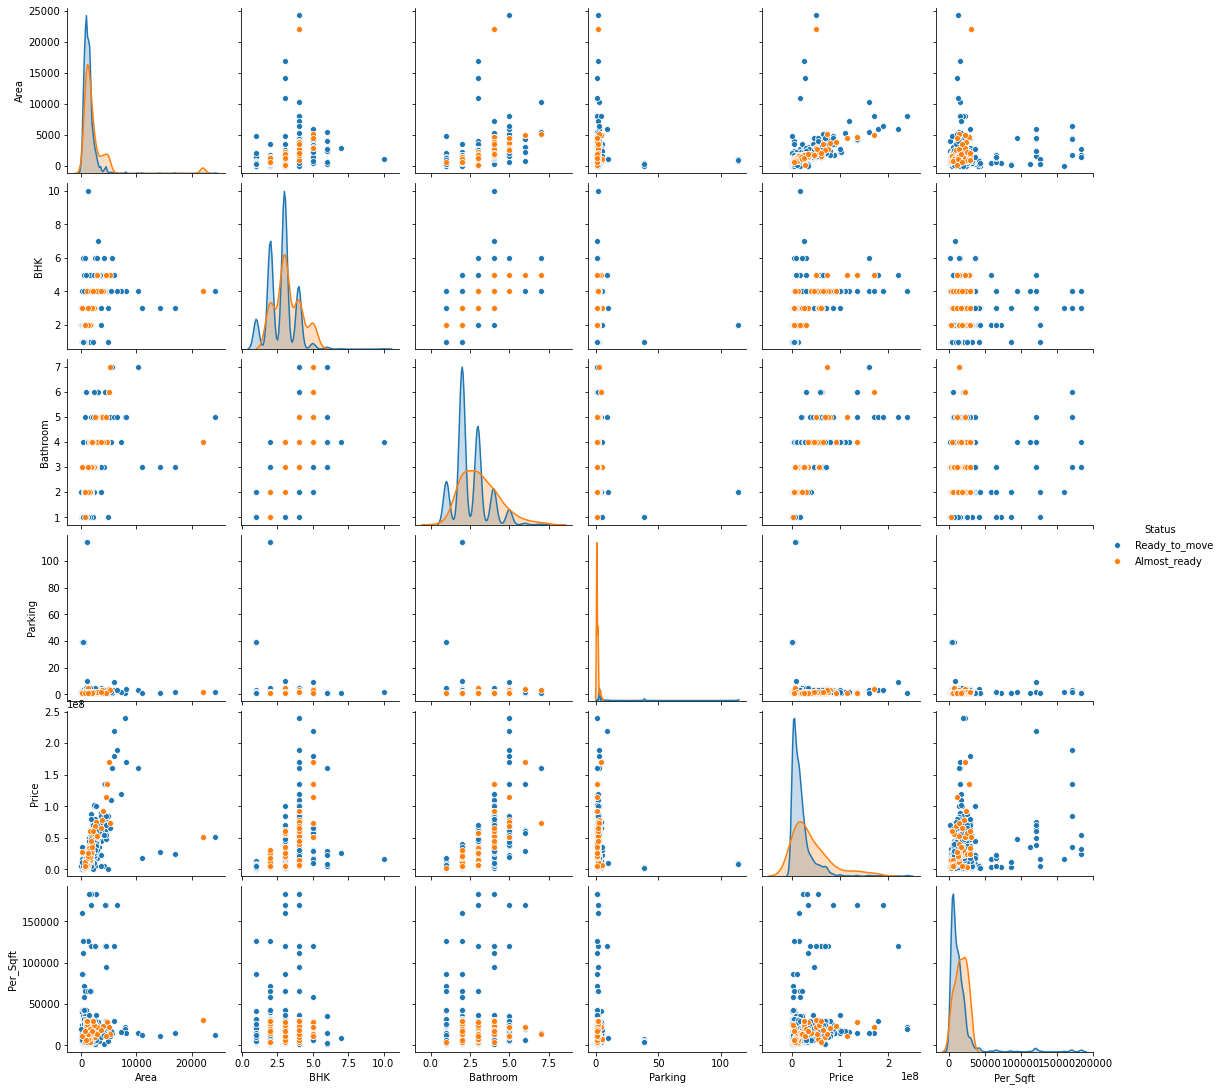

In [264]:
plt.figure(figsize=(10,8))
sns.pairplot(df,hue='Status')

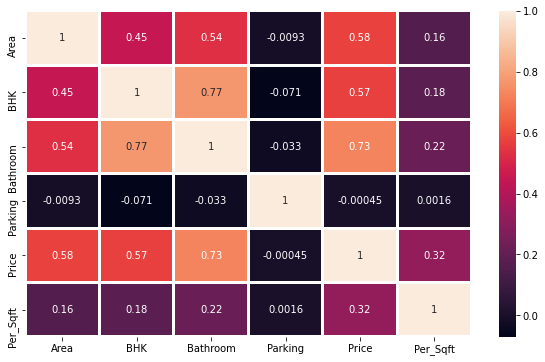

In [265]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linewidth=2)

<Figure size 720x432 with 0 Axes>

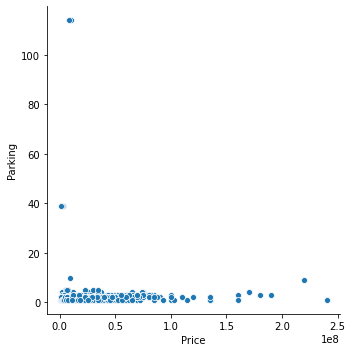

In [266]:
plt.figure(figsize=(10,6))
sns.relplot(x='Price',y='Parking',data=df)

We can drop Parking as we can see it has very low correlation with Price .

In [267]:
df.drop('Parking',inplace=True,axis=1)

In [268]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [269]:
df.Transaction.value_counts()

Resale          781
New_Property    478
Name: Transaction, dtype: int64

In [270]:
df.Locality.value_counts()

Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       34
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       33
J R Designers Floors, Ro

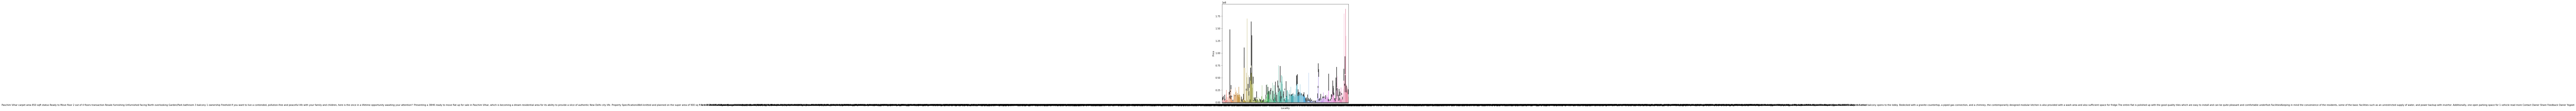

In [271]:
plt.figure(figsize=(10,8))
sns.barplot(x='Locality',y='Price',data=df)

As we find that there is no relation between Locality and Price so We will Drop Locality column

In [272]:
df.drop('Locality',inplace=True,axis=1)

Impurting Missing values

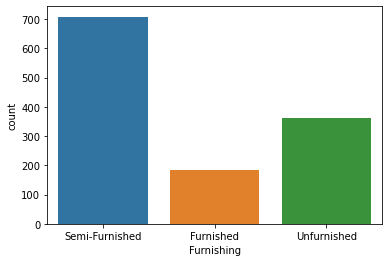

In [273]:
sns.countplot('Furnishing',data=df)

In [274]:
df.Furnishing.value_counts()

Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

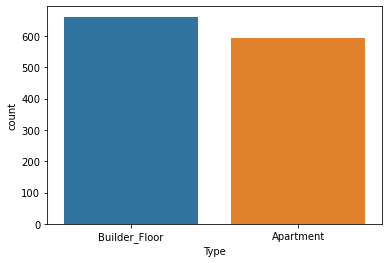

In [275]:
sns.countplot('Type',data=df)

In [276]:
df.Type.value_counts()

Builder_Floor    661
Apartment        593
Name: Type, dtype: int64

In [277]:
df['Bathroom']=df['Bathroom'].fillna(df['Bathroom'].median())
df['Per_Sqft']=df['Per_Sqft'].fillna(df['Per_Sqft'].median())
frequent_fur=df['Furnishing'].mode()[0]
df['Furnishing'].fillna(frequent_fur,inplace=True)
df['Type']=df['Type'].fillna(df['Type'].mode()[0])


In [278]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

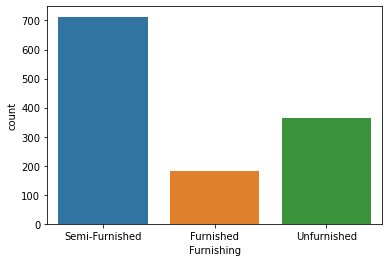

In [279]:
sns.countplot('Furnishing',data=df)

In [280]:
df.Furnishing.value_counts()

Semi-Furnished    713
Unfurnished       363
Furnished         183
Name: Furnishing, dtype: int64

In [282]:
df=pd.get_dummies(df,drop_first=True)

In [283]:
df.head()

,Area,BHK,Bathroom,Price,Per_Sqft,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Status_Ready_to_move,Transaction_Resale,Type_Builder_Floor
0,800.0,3,2.0,6500000,11291.5,1,0,1,0,1
1,750.0,2,2.0,5000000,6667.0,1,0,1,0,0
2,950.0,2,2.0,15500000,6667.0,0,0,1,1,0
3,600.0,2,2.0,4200000,6667.0,1,0,1,1,1
4,650.0,2,2.0,6200000,6667.0,1,0,1,0,1


In [284]:
df.shape

(1259, 10)

In [288]:
x=df.drop('Price',axis=1)
y=df['Price']
y=y.values.reshape(len(y),1)

Scaling the features

In [289]:
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)


Split the dataset

In [291]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Models 

Linear Regression

In [292]:
regressor1=LinearRegression()
regressor1.fit(x_train,y_train)

LinearRegression()

In [293]:
y_pred1=regressor1.predict(x_test)

In [295]:
r2_score(y_test,y_pred1)

0.5884059187625594

Polynomial regression

In [307]:
poly=PolynomialFeatures(degree=2)
poly_x=poly.fit_transform(x_train)
regressor2=LinearRegression()
regressor2.fit(poly_x,y_train)


LinearRegression()

In [308]:
y_pred2=regressor2.predict(poly.fit_transform(x_test))

In [309]:
r2_score(y_test,y_pred2)

0.77633900201254

Support vector Regression

In [310]:
regressor3=SVR(kernel='rbf')
regressor3.fit(x_train,y_train)

C:\Anaconda_program\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [311]:
y_pred3=regressor3.predict(x_test)

In [312]:
r2_score(y_test,y_pred3)

0.863119086295453

Decision Tree Regression

In [314]:
regressor4=DecisionTreeRegressor()
regressor4.fit(x_train,y_train)

DecisionTreeRegressor()

In [315]:
y_pred4=regressor4.predict(x_test)

In [316]:
r2_score(y_test,y_pred4)

0.7798802314103451

Random Forest Regression

In [366]:
regressor5=RandomForestRegressor(n_estimators=10,random_state=90)
regressor5.fit(x_train,y_train)

<ipython-input-366-7ba09f85dc2f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor5.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=90)

In [367]:
y_pred5=regressor5.predict(x_test)

In [368]:
r2_score(y_test,y_pred5)

0.8466650001347703

we see 
Linear Regression --- 0.5884059187625594
Polynomial Regression --- 0.77633900201254
Support Vector Regression --- 0.863119086295453  ########### BEST ACCURACY ###########
Decisionn Tree Regression  --- 0.7798802314103451
Random Forest Regression --- 0.8466650001347703